In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# mpg 데이터 로드
mpg= sns.load_dataset('mpg')

#결측치 제거
mpg = mpg.dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [ ]:
# 이름의 첫 단어를 브랜드명으로 추출
def find_brand(name):
    return name.split()[0]

In [ ]:
mpg["brand"] = mpg["name"].apply(find_brand)
mpg["brand"].head()

,brand
0,chevrolet
1,buick
2,plymouth
3,amc
4,ford


In [ ]:
# 브랜드 별 차량 수 확인
brand_count = mpg["brand"].value_counts()
brand_count

,count
brand,
ford,48
chevrolet,43
plymouth,31
dodge,28
amc,27
toyota,25
datsun,23
buick,17
pontiac,16


In [ ]:
# plymouth 브랜드 선택
brand = 'plymouth'
plymouth = mpg[mpg['brand'] == brand]

In [ ]:
plymouth.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii,plymouth
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340,plymouth
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster,plymouth
34,16.0,6,225.0,105.0,3439,15.5,71,usa,plymouth satellite custom,plymouth
41,14.0,8,318.0,150.0,4096,13.0,71,usa,plymouth fury iii,plymouth
56,26.0,4,91.0,70.0,1955,20.5,71,usa,plymouth cricket,plymouth
64,15.0,8,318.0,150.0,4135,13.5,72,usa,plymouth fury iii,plymouth
75,14.0,8,318.0,150.0,4077,14.0,72,usa,plymouth satellite custom (sw),plymouth
93,14.0,8,318.0,150.0,4237,14.5,73,usa,plymouth fury gran sedan,plymouth


In [ ]:
# plymouth에서 표본 추출
sample_size = 15
np.random.seed(42)
sp = plymouth.sample(n=sample_size, random_state=1)
sp

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
342,30.0,4,135.0,84.0,2385,12.9,81,usa,plymouth reliant,plymouth
15,22.0,6,198.0,95.0,2833,15.5,70,usa,plymouth duster,plymouth
208,13.0,8,318.0,150.0,3940,13.2,76,usa,plymouth volare premier v8,plymouth
271,23.2,4,156.0,105.0,2745,16.7,78,usa,plymouth sapporo,plymouth
256,20.5,6,225.0,100.0,3430,17.2,78,usa,plymouth volare,plymouth
227,19.0,6,225.0,100.0,3630,17.7,77,usa,plymouth volare custom,plymouth
219,25.5,4,122.0,96.0,2300,15.5,77,usa,plymouth arrow gs,plymouth
191,22.0,6,225.0,100.0,3233,15.4,76,usa,plymouth valiant,plymouth
97,18.0,6,225.0,105.0,3121,16.5,73,usa,plymouth valiant,plymouth
302,34.5,4,105.0,70.0,2150,14.9,79,usa,plymouth horizon tc3,plymouth


In [ ]:
# 평균, 표준편차 계산
sp_mean = sp['mpg'].mean()
sp_std = sp['mpg'].std()

sp_mean, sp_std

(21.86, 6.669418479683432)

In [ ]:
# 표준 오차
std_error = sp_mean/np.sqrt(sample_size)
std_error

5.6442277298729415

In [ ]:
# 신뢰구간: 99%
cof_level = 0.99
freedom = sample_size - 1
cof_interval = stats.t.interval(cof_level, freedom, sp_mean, std_error)
cof_interval

(5.058021691193346, 38.66197830880665)

In [ ]:
# 결과 정리
print(f'표본의 크키 :{sample_size}')
print(f"표본의 평균연비 :{sp_mean:.3f}")
print(f"표준 오차 :{std_error:.3f}")

#구간 추정 (99%)
print(f"plymouth 브랜드의 평균연비 99% 신뢰구간: {cof_interval[0]:.5f} ~ {cof_interval[1]:.5f}")

# 모집단 데이터와 비교
plymouth_mean = plymouth['mpg'].mean()
print(f'모집단의 평균연비 : {plymouth_mean:.2f}')

표본의 크키 :15
표본의 평균연비 :21.860
표준 오차 :5.644
plymouth 브랜드의 평균연비 99% 신뢰구간: 5.05802 ~ 38.66198
모집단의 평균연비 : 21.70


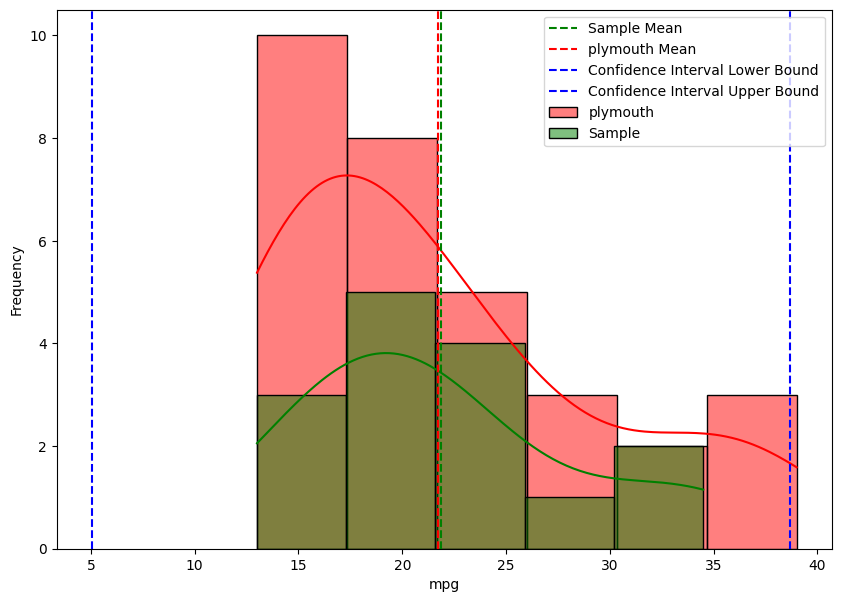

In [ ]:
#시각화
plt.figure(figsize=(10,7))
sns.histplot(plymouth['mpg'], kde=True, color='red', label='plymouth')
sns.histplot(sp['mpg'], kde=True, color='green', label='Sample', alpha=0.5)
plt.axvline(sp_mean, color= 'green', linestyle='--', label='Sample Mean')
plt.axvline(plymouth_mean, color= 'red', linestyle='--', label='plymouth Mean')
plt.axvline(cof_interval[0], color= 'blue', linestyle='--', label='Confidence Interval Lower Bound')
plt.axvline(cof_interval[1], color= 'blue', linestyle='--', label='Confidence Interval Upper Bound')
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.legend()
plt.show()

plymouth 그룹의 표본을 통해 연비를 추정한 결과, 신뢰구간에 plymouth 모집단의 평균 연비가 포함되는 것을 확인할 수 있었다.